이 노트북을 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.

<table class="tfo-notebook-buttons" align="left">
    <a target="_blank" href="https://colab.research.google.com/github/SLCFLAB/FinTech2021/blob/master/ML_day7.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

# Reference
https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


# Regression

In [41]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

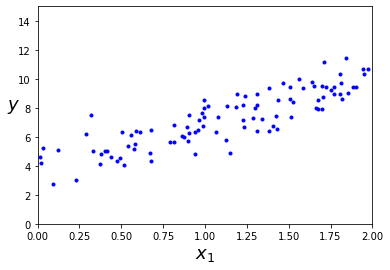

In [42]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [45]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(X.shape, y.shape)

(100, 1) (100, 1)


In [5]:
lin_reg.intercept_, lin_reg.coef_


(array([4.08103661]), array([[2.77534456]]))

In [6]:
X_new = np.array([[0], [2]])

In [7]:
X_new

array([[0],
       [2]])

In [8]:
y_predict = lin_reg.predict(X_new)

In [9]:
y_predict


array([[4.08103661],
       [9.63172574]])

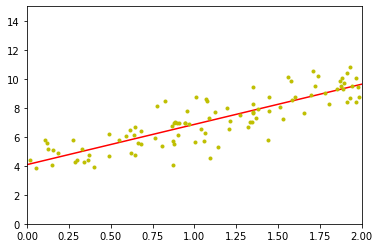

In [10]:
plt.plot(X_new, y_predict, "r-", label="linear")
plt.plot(X, y, "y.")
plt.axis([0, 2, 0, 15])
plt.show()


In [11]:
from sklearn.metrics import r2_score 
r2_score(y,lin_reg.predict(X))

0.7312442638445216

# To-do

In [67]:
dataset = pd.read_csv('student_scores.csv')
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


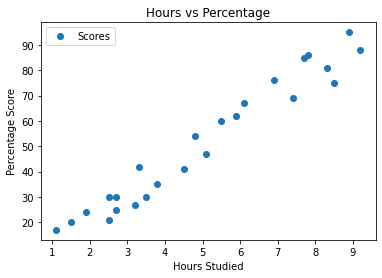

In [68]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


In [69]:
# To-do
# Linear Regerssion 피팅시키고 6시간 투자했을 때 예상 성적 출력

# 예시정답
hours = dataset['Hours'].values.reshape(25,1)
scores = dataset['Scores'].values.reshape(25,1)

lin_reg = LinearRegression()
lin_reg.fit(hours,scores)
print(lin_reg.coef_)
print(lin_reg.predict([[6]]))

[[9.77580339]]
[[61.13849375]]


# Lasso

In [12]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

In [13]:
y_predict_lasso = lasso_reg.predict(X_new)


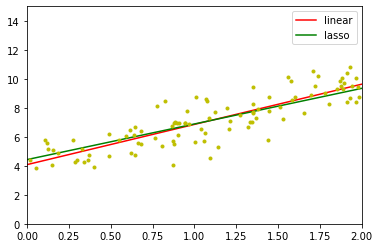

In [14]:
plt.plot(X_new, y_predict, "r-", label="linear")
plt.plot(X_new, y_predict_lasso, "g-", label="lasso")
plt.plot(X, y, "y.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [15]:
r2_score(y,lasso_reg.predict(X))

0.7216799093647067

# Ridge

In [16]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X, y)
y_predict_ridge = ridge_reg.predict(X_new)

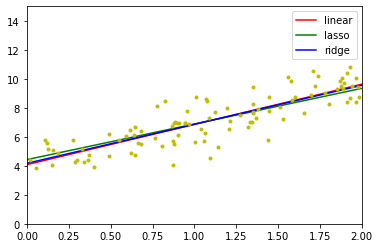

In [17]:
plt.plot(X_new, y_predict, "r-", label="linear")
plt.plot(X_new, y_predict_lasso, "g-", label="lasso")
plt.plot(X_new, y_predict_ridge, "b-", label="ridge")
plt.plot(X, y, "y.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

# Multiple Linear Regression

In [18]:
housing = pd.read_csv("https://raw.githubusercontent.com/SLCFLAB/FinTech2022/master/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
housing = housing[['median_income', 'total_rooms', 'median_house_value']]

In [20]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [21]:
X_train, y_train = train_set[['median_income', 'total_rooms']], train_set['median_house_value']
X_train = np.array(X_train)
y_train = np.array(y_train)

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [23]:
X_test, y_test = test_set[['median_income', 'total_rooms']], test_set['median_house_value']
X_test = np.array(X_test)
y_test = np.array(y_test)

In [24]:
lin_reg.predict(X_test)


array([115063.02828707, 150508.05903646, 190185.37683414, ...,
       431458.75452442, 161227.07363911, 193540.13838055])

In [25]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)
y_true = y_test
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
rmse

84210.3094307468

In [26]:
from sklearn.metrics import mean_absolute_error

y_pred = lin_reg.predict(X_test)
y_true = y_test
mae = mean_absolute_error(y_true, y_pred)
mae

62987.5275786113